# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build the query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nishinoomote
Processing Record 2 of Set 1 | tazovsky
Processing Record 3 of Set 1 | papao
Processing Record 4 of Set 1 | petropavlovsk-kamchatsky
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | lorengau
Processing Record 10 of Set 1 | chinde
Processing Record 11 of Set 1 | chonchi
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | dryden
Processing Record 14 of Set 1 | labrador city
Processing Record 15 of Set 1 | hawaiian paradise park
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | sandnessjoen
Processing Record 18 of Set 1 | wheaton
Processing Record 19 of Set 1 | cumaribo
City not found. Skipping...
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nishinoomote,30.7333,131.0000,19.51,69,3,8.49,JP,1715110799
1,tazovsky,67.4667,78.7000,-13.28,97,93,3.81,RU,1715111183
2,papao,-17.7500,-149.5500,28.82,75,98,8.38,PF,1715111183
3,petropavlovsk-kamchatsky,53.0452,158.6483,0.81,78,100,3.58,RU,1715111183
4,port alfred,-33.5906,26.8910,21.07,93,26,7.25,ZA,1715111183


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nishinoomote,30.7333,131.0000,19.51,69,3,8.49,JP,1715110799
1,tazovsky,67.4667,78.7000,-13.28,97,93,3.81,RU,1715111183
2,papao,-17.7500,-149.5500,28.82,75,98,8.38,PF,1715111183
3,petropavlovsk-kamchatsky,53.0452,158.6483,0.81,78,100,3.58,RU,1715111183
4,port alfred,-33.5906,26.8910,21.07,93,26,7.25,ZA,1715111183


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

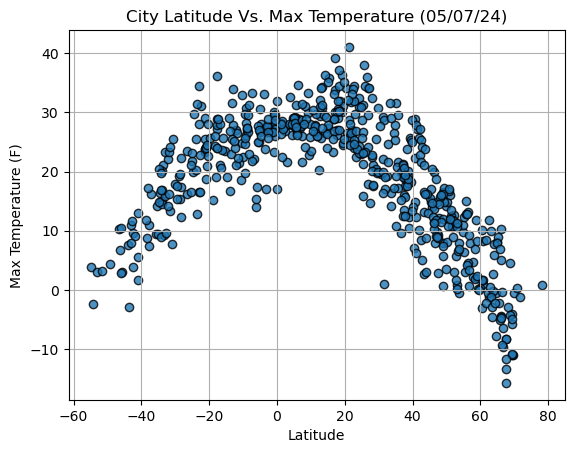

In [32]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title("City Latitude Vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

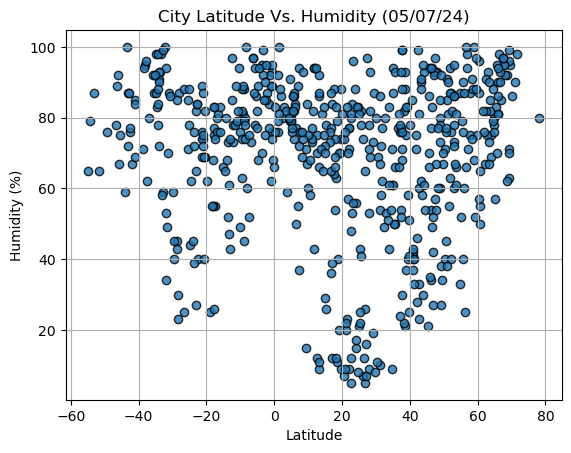

In [34]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title("City Latitude Vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

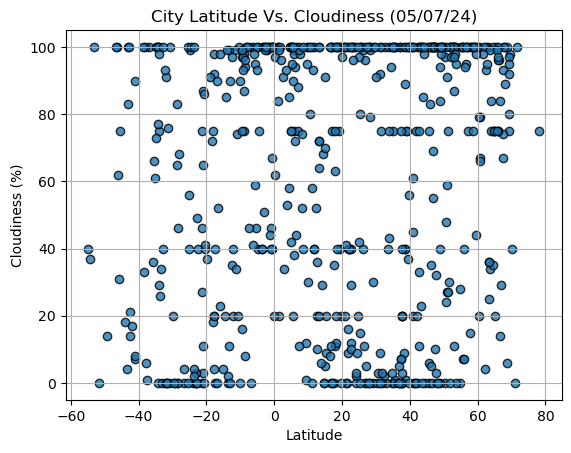

In [36]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title("City Latitude Vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

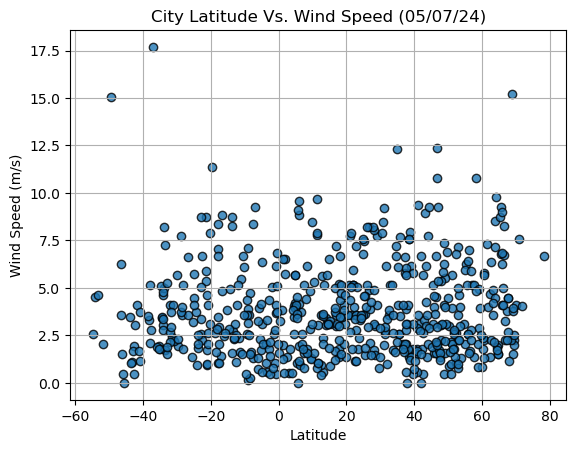

In [39]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title("City Latitude Vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [62]:
# Define a function to create Linear Regression plots
def linear_reg(x_values, y_values, x_label, y_label, line_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,line_coord,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r value is: {rvalue}")
    plt.show()


In [63]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nishinoomote,30.7333,131.0000,19.51,69,3,8.49,JP,1715110799
1,tazovsky,67.4667,78.7000,-13.28,97,93,3.81,RU,1715111183
3,petropavlovsk-kamchatsky,53.0452,158.6483,0.81,78,100,3.58,RU,1715111183
9,chinde,26.8418,88.0763,17.88,65,100,2.11,NP,1715111184
12,dryden,49.7833,-92.7503,14.20,67,100,6.90,CA,1715111185


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,papao,-17.7500,-149.5500,28.82,75,98,8.38,PF,1715111183
4,port alfred,-33.5906,26.8910,21.07,93,26,7.25,ZA,1715111183
5,bredasdorp,-34.5322,20.0403,16.30,83,100,3.43,ZA,1715111184
6,edinburgh of the seven seas,-37.0676,-12.3116,16.18,80,100,17.69,SH,1715111184
7,port-aux-francais,-49.3500,70.2167,4.40,76,14,15.03,TF,1715111184


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8588294916953942


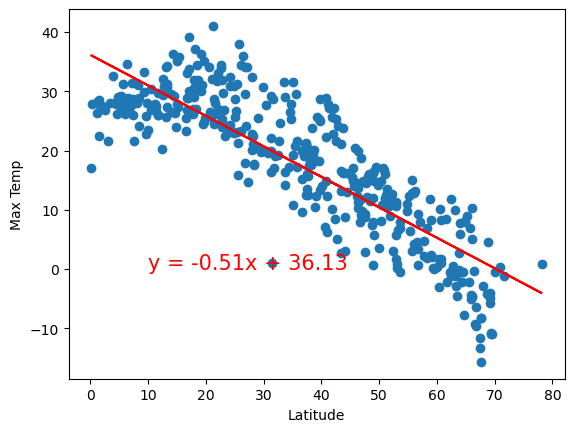

In [66]:
# Linear regression on Northern Hemisphere

linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", (10, 0))

The r value is: 0.7939394487719177


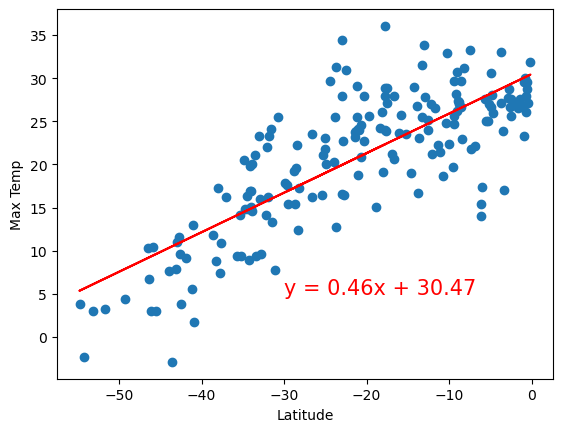

In [69]:
# Linear regression on Southern Hemisphere

linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", (-30, 5))

**Discussion about the linear relationship:** 

There is a strong negative correlation between max temp and latitude for the northern hemisphere. There is a strong positive correlation between max temp and latitude for the southern temperature. This means, as we get closer to the equator (latitude = 0), we expect to see a rise in max temp.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.16426584549987572


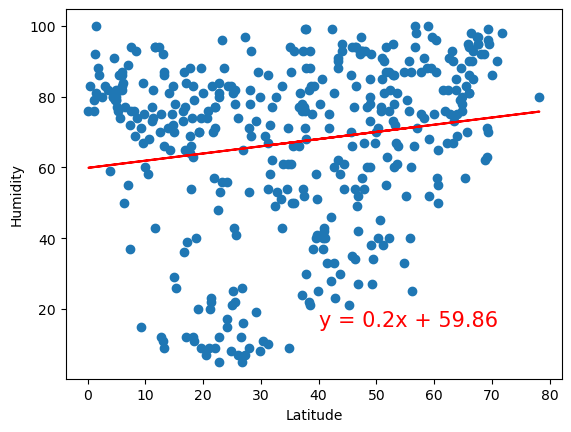

In [70]:
# Northern Hemisphere

linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", (40, 15))

The r value is: 0.05120845681109025


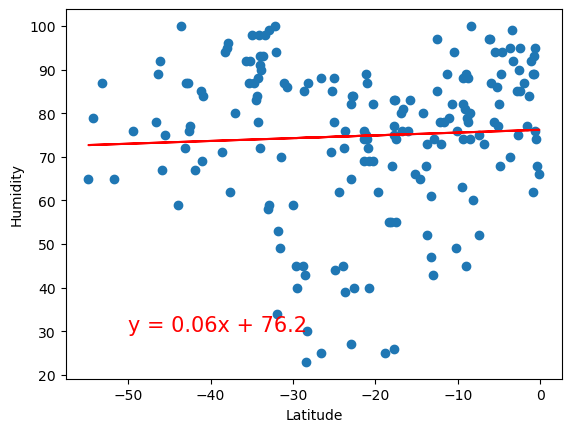

In [71]:
# Southern Hemisphere

linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", (-50, 30))

**Discussion about the linear relationship:** 

There is a weak correlation between latitude and humidity in both the northern and souther hemispheres. We can not draw a conclusion for the relationship between the two.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.08558384232345508


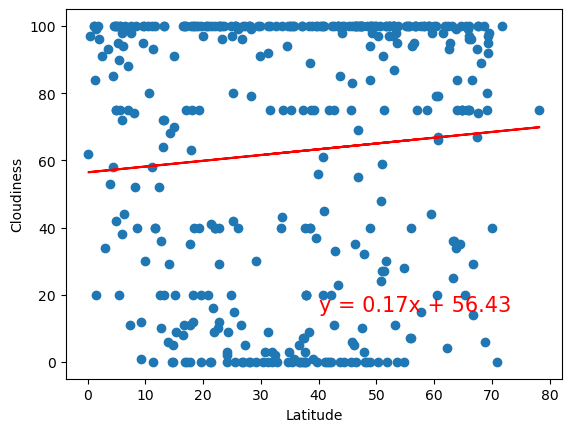

In [72]:
# Northern Hemisphere

linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", (40, 15))

The r value is: 0.20455461174120554


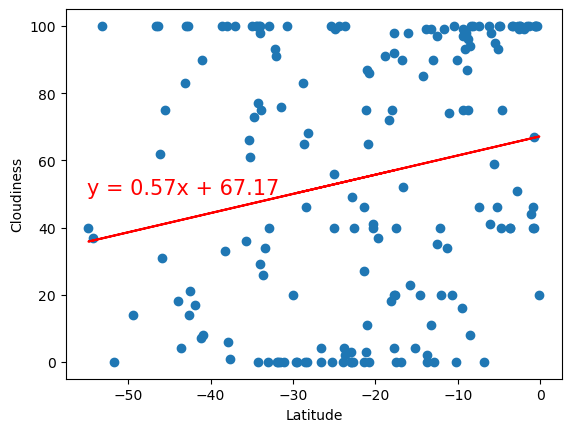

In [75]:
# Southern Hemisphere

linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", (-55, 50))

**Discussion about the linear relationship:** 

There is a weak correlation between latitude and cloudiness in both the northern and souther hemispheres. We can not draw a conclusion for the relationship between the two.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.07900278115878832


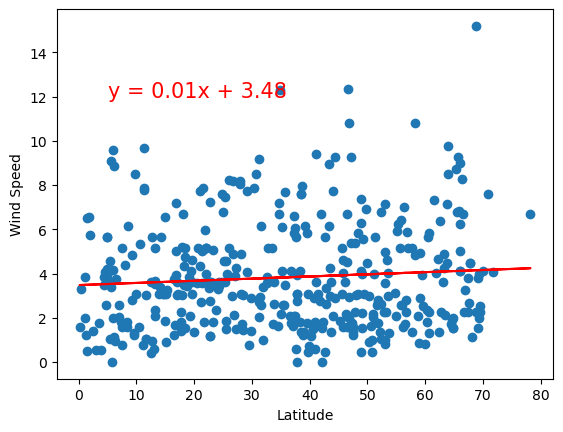

In [80]:
# Northern Hemisphere

linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", (5, 12))

The r value is: -0.06821897690803101


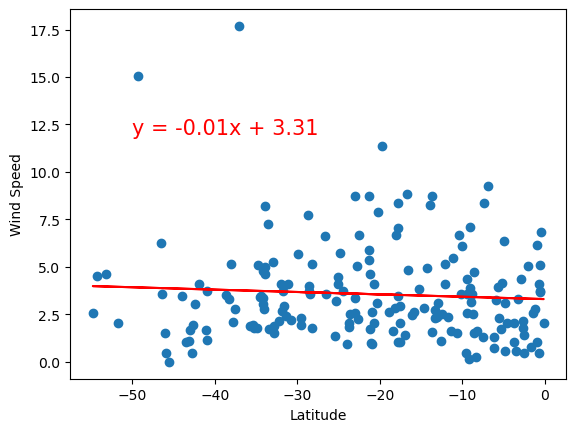

In [82]:
# Southern Hemisphere

linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** 

There is a weak to no correlation between latitude and windspeed in both the northern and souther hemispheres. We can not draw a conclusion for the relationship between the two.